# Исследовательский анализ данных (EDA)
## Messages To Technical Support

В этом ноутбуке проводится исследовательский анализ обращений в службу поддержки клиентов по различным технологическим продуктам.

## 1. Импорт библиотек и загрузка данных

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


## 2. Общая информация о датасете

In [7]:
df = pd.read_csv('../../data/raw/train_data.csv')
df.head()

,utterance,request,importance,utterance_ru
0,"i bought a product, could I modify my fucking ...",change_order,high_priority,я купил товар могу ли я изменить свою чертову...
1,"I changed my mind, what can I do to remove my ...",delete_account,standard_priority,Я передумал что я могу сделать чтобы удалить ...
2,I want to know where I cvan get a bill,get_invoice,medium_priority,Я хочу знать где я могу получить счет
3,tell me if my package is out for delivery,track_order,medium_priority,скажите мне отправлена ли моя посылка
4,how to set a different shipping address up?,set_up_shipping_address,medium_priority,как настроить другой адрес доставки?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26738 entries, 0 to 26737
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   utterance     26738 non-null  object
 1   request       26738 non-null  object
 2   importance    26738 non-null  object
 3   utterance_ru  26738 non-null  object
dtypes: object(4)
memory usage: 835.7+ KB


In [9]:
df.isnull().sum()

utterance       0
request         0
importance      0
utterance_ru    0
dtype: int64

**Вывод:**

В датасете 4 столбцов и 26738 строк. Пропусков не имеется

## 3. Анализ категориальных признаков

In [10]:
cat_cols = ['request', 'importance']
for col in cat_cols:
    # print(f'{col}:')
    print('----------')
    print(df[col].value_counts())

----------
request
payment_issue               4209
create_account              2186
contact_customer_service    2116
get_invoice                 1578
track_order                 1370
get_refund                  1307
contact_human_agent         1187
recover_password            1165
change_order                1108
delete_account              1091
complaint                    936
check_invoices               921
review                       802
check_refund_policy          702
delivery_options             597
check_cancellation_fee       596
track_refund                 552
check_payment_methods        517
switch_account               499
newsletter_subscription      464
delivery_period              397
edit_account                 384
registration_problems        383
change_shipping_address      367
set_up_shipping_address      364
place_order                  332
cancel_order                 310
check_invoice                298
Name: count, dtype: int64
----------
importance
medium_pr

Много категорий обращения, по приоритетам всего три категории

### Визуализация распределения по категориям

/tmp/ipykernel_2545/1499626814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
/tmp/ipykernel_2545/1499626814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');


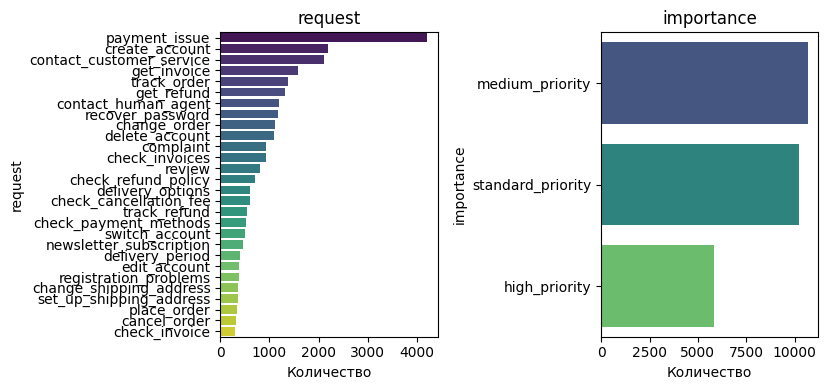

In [11]:
plt.figure(figsize=(16, 4));
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 4, i);
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
    plt.title(col);
    plt.xlabel('Количество');
plt.tight_layout();
plt.show();

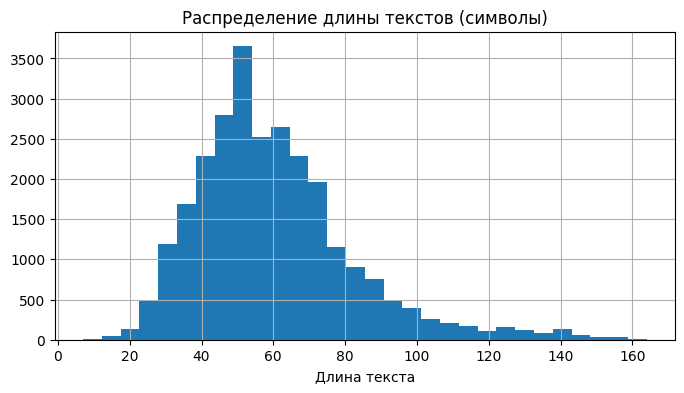

In [24]:
df['utterance_ru'].str.len().hist(bins=30, figsize=(8,4))
plt.title('Распределение длины текстов (символы)')
plt.xlabel('Длина текста')
plt.show()

**Вывод:**

Больше всего среди категорий обращений, является категория проблем с оплатой (payment_issue), по приоритетам, основное распределение приходится на средний приоритет (medium_priority) и стандартный приоритет (standart_priority), меньше всего высокого приоритета (high_priority), примерно половина от стандартного или среднего приоритета.

А также:
- Классы не сбалансированы.
- Тексты средней длинны по 50 символов.

## 4. Кросс-таблицы и тепловые карты

### Тип заявки vs Приоритет заявки

In [23]:
df['request'].value_counts()

request
payment_issue               4209
create_account              2186
contact_customer_service    2116
get_invoice                 1578
track_order                 1370
get_refund                  1307
contact_human_agent         1187
recover_password            1165
change_order                1108
delete_account              1091
complaint                    936
check_invoices               921
review                       802
check_refund_policy          702
delivery_options             597
check_cancellation_fee       596
track_refund                 552
check_payment_methods        517
switch_account               499
newsletter_subscription      464
delivery_period              397
edit_account                 384
registration_problems        383
change_shipping_address      367
set_up_shipping_address      364
place_order                  332
cancel_order                 310
check_invoice                298
Name: count, dtype: int64

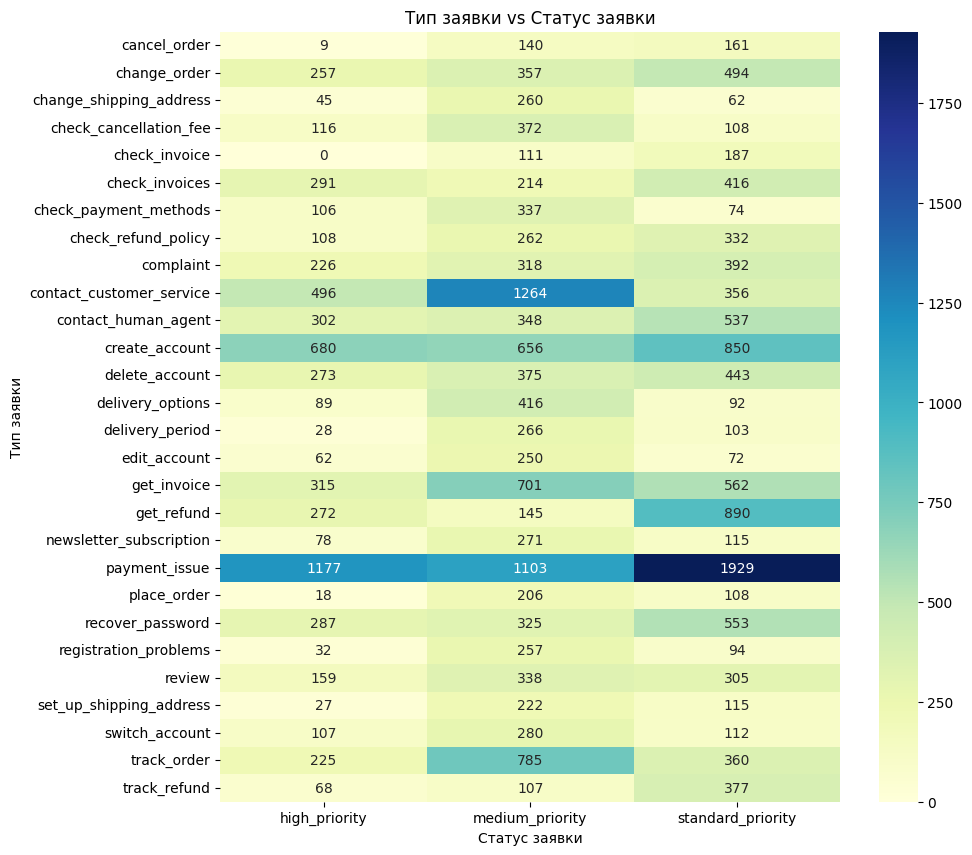

In [21]:
ct1 = pd.crosstab(df['request'], df['importance'])
plt.figure(figsize=(10, 10))
sns.heatmap(ct1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Тип заявки vs Статус заявки')
plt.ylabel('Тип заявки')
plt.xlabel('Статус заявки')
plt.show()

Среди высокого приоритета (все перечисления от большего к меньшему) выделяются категории проблем с оплатой (payment_issue), создание аккаунта (create_action), связи со службой в тех поддержку (какой электронный адрес у техподдержки, бесплатный общий номер телефона и тд). Среди среднего приоритета выделяются связь с тех поддержкой, проблемы с оплатой, отслеживание заказа (track_order), получение счета-фактуры (get_invoice) и создание аккаунта, среди стандартного приоритета наиболее ярким выделяются проблемы с оплатой, возврат денег за покупку (get_refund), создание аккаунта и далее более равномерно между собой сброс пароля, получение счета-фактуры, удаление аккаунта, проверка счета и так далее...

Важно понимать, что категория `contact_human_agent` назначается тогда когда выбор категории затруднен, например, обращение не подошло ни под одну из других категорий, также стоит смотреть на вероятности классов, так можно понять насколько уверенно модель назначила категорию какому-либо обращению.

## 5. Анализ текстовых обращений

Посмотрим примеры описаний обращений:

In [14]:
df['utterance_ru'].dropna().sample(5, random_state=42).values

array([' могу ли я создать учетную запись пользователя? ',
       ' я доволен обслуживанием оставьте отзыв ',
       ' не могли бы вы сообщить мне какой бесплатный номер телефона используется для обслуживания клиентов? ',
       ' помогите мне узнать в какие часы я могу обратиться в службу поддержки клиентов ',
       ' Я хочу сообщить о проблеме с оплатой что я могу сделать? '],
      dtype=object)

Теперь посмотрим на выделяющиеся слова для каждой категории

In [26]:
for ttype in df['request'].unique():
    texts = df[df['request'] == ttype]['utterance_ru']
    words = ' '.join(texts).lower().split()
    counter = Counter(words)
    print(f'Топ-10 слов для класса {ttype}:', [w for w, _ in counter.most_common(10)])

Топ-10 слов для класса change_order: ['я', 'изменить', 'мне', 'что', 'могу', 'свой', 'свою', 'товар', 'как', 'заказ']
Топ-10 слов для класса delete_account: ['я', 'мне', 'удалить', 'запись', 'учетную', 'могу', 'не', 'свой', 'как', 'передумал']
Топ-10 слов для класса get_invoice: ['я', 'получить', 'счет', 'хочу', 'как', 'могу', 'мне', 'не', 'счета', 'вы']
Топ-10 слов для класса track_order: ['я', 'могу', 'проверить', 'как', 'где', 'не', 'хочу', 'мне', 'отследить', 'ли']
Топ-10 слов для класса set_up_shipping_address: ['доставки', 'адрес', 'я', 'другой', 'мне', 'указать', 'адреса', 'настроить', 'доставки?', 'не']
Топ-10 слов для класса payment_issue: ['с', 'я', 'об', 'сообщить', 'меня', 'мне', 'о', 'оплатой', 'при', 'попытке']
Топ-10 слов для класса switch_account: ['я', 'на', 'мне', 'другой', 'учетную', 'использовать', 'запись', 'перейти', 'другую', 'хочу']
Топ-10 слов для класса delivery_period: ['я', 'мне', 'могу', 'когда', 'о', 'узнать', 'доставки', 'вы', 'как', 'сроках']
Топ-10 слов

Есть отличительные особенности, так, например, для категории удаления акаунта частые слова удалить, запись и так далее.

## 6. Выводы

- В датасете представлены 28 типов обращений (столбец request): проблемы с оплатой, возврат денег за покупку (get_refund), создание аккаунта, сброс пароля, получение счета-фактуры, удаление аккаунта, проверка счета и так далее...
- Приоритет заявки: стандартный, средний, высокий
- Приоритеты стандартный и средний распределены равномерно, а высокий приоритет в половину меньше одного из них.
- Пропусков в данных не обнаружено.
- Датасет хорошо подходит для задач анализа клиентской поддержки, построения моделей машинного обучения и визуализации процессов поддержки.